In [1]:
import MPO_class as MPO
import MPS_class as MPS
import SpinSystems_1d as SS1d
import dmrg1 as dmrg
import thermal_tdvp2 as ttdvp
from MixedMPS_class import mix_compute_corr
import SpinSystems_2d as SS2d

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ncon import ncon

from compute_connected_correlation_function import compute_corr

In [2]:
%matplotlib inline
L = 32
h = 0.1
H = SS1d.Long_Range_Ising(L,alpha=1.5,hz=h)
#H.compressMPO(1e-15)
#plt.imshow(H.W[-1].transpose(0,2,1,3).reshape(14,2))

Err approx pow_law 0.00012825306350803961
1.8171372637200902


In [197]:
beta_space = np.arange(0,4,0.02)
dbeta = beta_space[1]-beta_space[0]

h_space = np.array([0,.5,1,1.5,2])#,4,6,8,10])

m = [[] for x in range(h_space.size)]

L = 16
G = []; op1 = []; op2 = []
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
for jh, h in enumerate(h_space):
    print('h', h, end=' ')
    H = SS1d.IsingMPO(L, h=h)#alpha=0.5, hz=h)
    engine = ttdvp.thermalTDVP2(H)
    engine.initialize()
    engine.chi_MAX = 128
    for beta in beta_space:
        print('T',1/beta,end =' ')
        corr_stuff = mix_compute_corr(engine.MPS, Z)
        m[jh].append(((corr_stuff[1][1]-np.diag(np.diag(corr_stuff[1][1]))).sum())/((L-1)*L) )
        print('mx',m[jh][-1])
        engine.beta_step(dbeta/2, 1e-11)
        

h 0.0 T inf mx 0.0
T 50.0 

<ipython-input-197-ad92f5fc2a4b>:19: RuntimeWarning: divide by zero encountered in double_scalars
  print('T',1/beta,end =' ')
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[1] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[2] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[3] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


mx 0.0025472035551697054
T 25.0 mx 0.005190990197097584
T 16.666666666666668 mx 0.007934687708788803
T 12.5 mx 0.010781708557087473
T 10.0 mx 0.013735549090592014
T 8.333333333333334 mx 0.01679978835019171
T 7.142857142857142 mx 0.019978086446879015
T 6.25 mx 0.023274182457178997
T 5.555555555555555 mx 0.026691891781850094
T 5.0 mx 0.030235102908405573
T 4.545454545454546 mx 0.033907773512455094
T 4.166666666666667 mx 0.037713925826861804
T 3.846153846153846 mx 0.04165764120119226
T 3.571428571428571 mx 0.04574305376695218
T 3.3333333333333335 mx 0.049974343116668894
T 3.125 mx 0.05435572589708914
T 2.941176470588235 mx 0.058891446208846905
T 2.7777777777777777 mx 0.06358576469715858
T 2.6315789473684212 mx 0.06844294621097285
T 2.5 mx 0.07346724590211083
T 2.380952380952381 mx 0.07866289363215737
T 2.272727272727273 mx 0.08403407655424186
T 2.1739130434782608 mx 0.08958491974053248
T 2.0833333333333335 mx 0.09531946473561455
T 2.0 mx 0.10124164593216918
T 1.923076923076923 mx 0.107355

C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[7] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[5] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


T 0.641025641025641 mx 0.6360415641602024
T 0.6329113924050632 mx 0.6463449034130749
T 0.625 mx 0.6564793292670655
T 0.6172839506172839 mx 0.6664397811876498
T 0.6097560975609756 mx 0.6762217607910299
T 0.6024096385542168 mx 0.685821320203552
T 0.5952380952380952 mx 0.6952350481423346
T 0.5882352941176471 mx 0.7044600540043897
T 0.5813953488372093 mx 0.713493950243891
T 0.5747126436781609 mx 0.7223348333069457
T 0.5681818181818182 mx 0.7309812633807499
T 0.5617977528089888 mx 0.7394322431999668
T 0.5555555555555556 mx 0.7476871961377946
T 0.5494505494505494 mx 0.7557459437930238
T 0.5434782608695652 mx 0.7636086832675218
T 0.5376344086021505 mx 0.7712759643117517
T 0.5319148936170213 mx 0.7787486664988349


C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[6] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


T 0.5263157894736842 mx 0.7860279765710845
T 0.5208333333333334 mx 0.7931153660865559
T 0.5154639175257733 mx 0.8000125694775944
T 0.5102040816326531 mx 0.8067215626182761
T 0.5050505050505051 mx 0.8132445419835547
T 0.5 mx 0.8195839044695709
T 0.49504950495049505 mx 0.8257422279322129
T 0.49019607843137253 mx 0.8317222524895479
T 0.4854368932038835 mx 0.8375268626232371
T 0.4807692307692307 mx 0.8431590701044852
T 0.47619047619047616 mx 0.8486219977614115
T 0.4716981132075471 mx 0.8539188640969521
T 0.4672897196261682 mx 0.8590529687595638
T 0.4629629629629629 mx 0.8640276788628152
T 0.4587155963302752 mx 0.8688464161447516
T 0.45454545454545453 mx 0.8735126449531941
T 0.4504504504504504 mx 0.878029861039349
T 0.4464285714285714 mx 0.8824015811386736
T 0.44247787610619466 mx 0.8866313333153019
T 0.43859649122807015 mx 0.8907226480440843
T 0.4347826086956521 mx 0.8946790500025394
T 0.4310344827586207 mx 0.8985040505437281
T 0.4273504273504274 mx 0.9022011408200948
T 0.42372881355932207

C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[4] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


T 0.32679738562091504 mx 0.9755162594421399
T 0.3246753246753247 mx 0.9764602212558596
T 0.3225806451612903 mx 0.9773683885058465
T 0.3205128205128205 mx 0.9782420728081558
T 0.3184713375796178 mx 0.9790825412163032
T 0.3164556962025316 mx 0.979891017462819
T 0.31446540880503143 mx 0.9806686831885599
T 0.3125 mx 0.9814166791577271
T 0.3105590062111801 mx 0.9821361064567783
T 0.30864197530864196 mx 0.9828280276756406
T 0.3067484662576687 mx 0.9834934680698907
T 0.3048780487804878 mx 0.9841334167026808
T 0.303030303030303 mx 0.9847488275654409
T 0.3012048192771084 mx 0.9853406206764806
T 0.29940119760479045 mx 0.9859096831568246
T 0.2976190476190476 mx 0.9864568702827239
T 0.2958579881656805 mx 0.9869830065143641
T 0.29411764705882354 mx 0.987488886500482
T 0.29239766081871343 mx 0.9879752760586437
T 0.29069767441860467 mx 0.9884429131310757
T 0.28901734104046245 mx 0.9888925087159229
T 0.28735632183908044 mx 0.9893247477740592
T 0.2857142857142857 mx 0.9897402901114188
T 0.2840909090909

T 0.33557046979865773 mx 0.8184591010342946
T 0.3333333333333333 mx 0.8203920043765632
T 0.33112582781456956 mx 0.822280935709852
T 0.32894736842105265 mx 0.8241268160508677
T 0.32679738562091504 mx 0.8259305792100476
T 0.3246753246753247 mx 0.8276931422287859
T 0.3225806451612903 mx 0.8294154054469695
T 0.3205128205128205 mx 0.8310982525882139
T 0.3184713375796178 mx 0.8327425508613688
T 0.3164556962025316 mx 0.8343491510768591
T 0.31446540880503143 mx 0.8359188877765283
T 0.3125 mx 0.8374525793757992
T 0.3105590062111801 mx 0.8389510564287509
T 0.30864197530864196 mx 0.8404151047182853
T 0.3067484662576687 mx 0.8418454668372731
T 0.3048780487804878 mx 0.8432428983172002
T 0.303030303030303 mx 0.8446081394223324
T 0.3012048192771084 mx 0.8459419752418422
T 0.29940119760479045 mx 0.8472453212560427
T 0.2976190476190476 mx 0.8485185986885917
T 0.2958579881656805 mx 0.8497624887760707
T 0.29411764705882354 mx 0.8509776585146401
T 0.29239766081871343 mx 0.8521647608748907
T 0.290697674418

T 0.3472222222222222 mx 0.32708461736429917
T 0.3448275862068966 mx 0.3277019079300719
T 0.3424657534246575 mx 0.3283082574180773
T 0.3401360544217687 mx 0.32890384468878586
T 0.33783783783783783 mx 0.3294888452176995
T 0.33557046979865773 mx 0.3300634311727022
T 0.3333333333333333 mx 0.3306277714893662
T 0.33112582781456956 mx 0.33118203194427875
T 0.32894736842105265 mx 0.3317263752264145
T 0.32679738562091504 mx 0.3322609610066333
T 0.3246753246753247 mx 0.3327859460053304
T 0.3225806451612903 mx 0.3333014840583084
T 0.3205128205128205 mx 0.3338077261809005
T 0.3184713375796178 mx 0.33430482063042594
T 0.3164556962025316 mx 0.3347929129669821
T 0.31446540880503143 mx 0.3352721461126626
T 0.3125 mx 0.3357426604092115
T 0.3105590062111801 mx 0.3362045936741801
T 0.30864197530864196 mx 0.3366580812556316
T 0.3067484662576687 mx 0.3371032560854164
T 0.3048780487804878 mx 0.3375402548964651
T 0.303030303030303 mx 0.3379692054691751
T 0.3012048192771084 mx 0.338390236707775
T 0.2994011976

T 0.3623188405797101 mx 0.09602378266528545
T 0.3597122302158273 mx 0.09589612672184301
T 0.3571428571428571 mx 0.09577028734722273
T 0.3546099290780142 mx 0.09564624317208761
T 0.35211267605633806 mx 0.09552398766721183
T 0.3496503496503497 mx 0.09540351323649698
T 0.3472222222222222 mx 0.09528481128803686
T 0.3448275862068966 mx 0.09516787230157267
T 0.3424657534246575 mx 0.09505268589252676
T 0.3401360544217687 mx 0.0949392408727823
T 0.33783783783783783 mx 0.09482752530836963
T 0.33557046979865773 mx 0.09471752657421444
T 0.3333333333333333 mx 0.09460923140608285
T 0.33112582781456956 mx 0.09450262594986876
T 0.32894736842105265 mx 0.09439769580834372
T 0.32679738562091504 mx 0.09429442608549819
T 0.3246753246753247 mx 0.09419280142858087
T 0.3225806451612903 mx 0.09409280606795643
T 0.3205128205128205 mx 0.09399442385488065
T 0.3184713375796178 mx 0.09389763829728662
T 0.3164556962025316 mx 0.09380243259368506
T 0.31446540880503143 mx 0.09370878966526691
T 0.3125 mx 0.093616692186

T 0.3846153846153846 mx 0.05161471196616415
T 0.38167938931297707 mx 0.0515903962437021
T 0.3787878787878788 mx 0.051566988345233995
T 0.37593984962406013 mx 0.05154445556671284
T 0.3731343283582089 mx 0.05152276628969836
T 0.37037037037037035 mx 0.05150188995246891
T 0.3676470588235294 mx 0.05148179702127987
T 0.36496350364963503 mx 0.05146245896183569
T 0.3623188405797101 mx 0.051443848211039506
T 0.3597122302158273 mx 0.051425938149068304
T 0.3571428571428571 mx 0.05140870307182201
T 0.3546099290780142 mx 0.05139211816378334
T 0.35211267605633806 mx 0.05137615947132284
T 0.3496503496503497 mx 0.05136080387647709
T 0.3472222222222222 mx 0.05134602907122196
T 0.3448275862068966 mx 0.05133181353226172
T 0.3424657534246575 mx 0.05131813649634928
T 0.3401360544217687 mx 0.05130497793614726
T 0.33783783783783783 mx 0.05129231853664649
T 0.33557046979865773 mx 0.05128013967213682
T 0.3333333333333333 mx 0.05126842338374701
T 0.33112582781456956 mx 0.05125715235754709
T 0.32894736842105265 

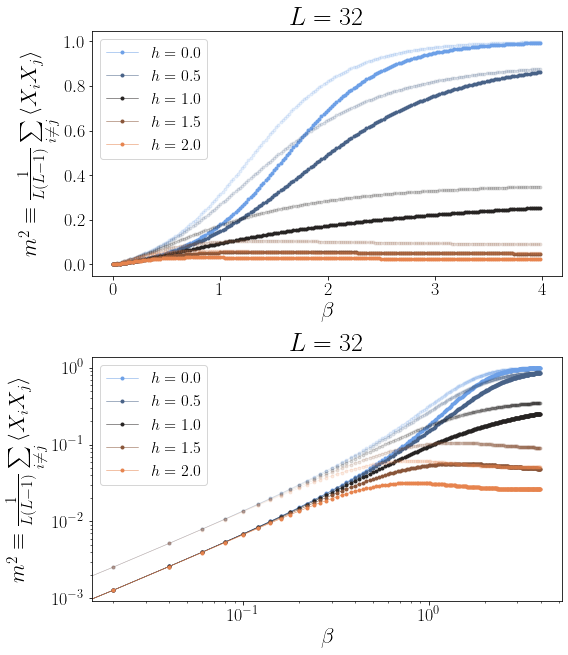

In [206]:
import matplotlib as mpl
plt.rc('text',usetex=True)

plt.figure(figsize=(8,4.6*2))
for i in range(1,3):
    plt.subplot(2,1,i)
    colors = sns.diverging_palette(250, 30, l=65, center="dark",n=h_space.size)
    for ih,h in enumerate(h_space):
        plt.plot(beta_space,m32[ih],'-o',markersize=3,linewidth=.5,color=colors[ih],label="$h=%.1f$"%(h))
        plt.plot(beta_space,m16[ih],'-o',alpha=.15,markersize=3,linewidth=.5,color=colors[ih])
    plt.tick_params(labelsize=18)


    #sm = plt.cm.ScalarMappable(cmap=sns.diverging_palette(250, 30, l=65, center="dark",as_cmap=True), norm=mpl.colors.Normalize(vmin=0.0, vmax=10))
    #cb = plt.colorbar(sm)
    #cb.ax.tick_params(labelsize=18)
    #cb.set_label(r"$h$",fontsize=22)

    plt.xlabel(r"$\beta$",fontsize=22)
    plt.ylabel(r"$m^2\equiv\frac{1}{L(L-1)}\sum\limits_{i\neq j}\left\langle X_i X_j \right\rangle$",fontsize=22)
    #plt.legend()
    plt.title(r"$L=32$",fontsize=26)
    #plt.xlim([0,10])

    plt.legend(fontsize=16)
    #cb.set_ticks(h_space)

    #plt.gcf().add_axes([0.185,.65,.14,.2])
    #plt.scatter(h_space,[m[ih][-1] for ih in range(h_space.size)],c=colors,s=5)
    #plt.plot(h_space,[m[ih][-1] for ih in range(h_space.size)],'k--',linewidth=.4)

    #plt.xlabel('$h$',fontsize=14,labelpad=-12.5)
    #plt.ylabel(r'$m_{T = 1}$',fontsize=14,labelpad=-10)
    #plt.yticks([0,1])

plt.yscale('log')
#plt.xlim([0,2])
plt.xscale('log')
#plt.savefig("m2_IsingLongRange.jpg",format='jpg',bbox_inches='tight',dpi=300)
plt.tight_layout()

plt.savefig("TFIC_thermal.jpg",format='jpg',bbox_inches='tight',dpi=400)

In [2]:
import MixedMPS_class as MPS_

def return_LocalMz(MPS):
    L = MPS.L
    tempMPS = MPS_.MPS(L,2)
    tempMPS.M = MPS.M.copy()
    sigma_z  = np.array([[1, 0], [0,-1]])
    sigma_x  = np.array([[0,1],[1,0]])
    mz = np.zeros(L,complex)
    LA = np.linalg
    mz[0] = ncon([tempMPS.M[0],sigma_x,tempMPS.M[0].conj()],[[1,2,5,3],[2,4],[1,4,5,3]])       
    for i in range(L-1):
            M = tempMPS.M[i]
            shpM = M.shape
            U, S, V = LA.svd(M.reshape(shpM[0]*shpM[1]*shpM[2], shpM[3]), full_matrices=False)
            S /= LA.norm(S)
            tempMPS.M[i] =  U.reshape(shpM[0], shpM[1],shpM[2], S.size)
            tempMPS.M[i+1] = ncon([np.diag(S)@V, tempMPS.M[i+1]],[[-1,1],[1,-2,-3,-4]])            
            mz[i+1] = ncon([tempMPS.M[i+1],sigma_x,tempMPS.M[i+1].conj()],[[1,2,5,3],[2,4],[1,4,5,3]])       
    return mz.real

In [118]:
#H_LR = SS1d.Long_Range_Ising(32,alpha=1.5,hz=0.2,J=1)#,k=5)
#H_SR = SS1d.Long_Range_Ising(32,alpha=2.5,hz=0.2,J=1,k=5)#,k=4)

H = SS1d.IsingMPO_XX_coupling(14,hz=0.2,hx=0.15)

In [120]:
engine1 = ttdvp.thermalTDVP2(H)
engine0 = ttdvp.thermalTDVP2(H)

for engine in [engine0,engine1]:
    engine.initialize()

In [126]:
for k,engine in enumerate([engine0,engine1]):
    for i in range(len(engine.MPS.M)):
        xL = 1e2*7.01;
        xR = 0.;
        if k == 1:
            xR=xL
        if i < engine.L//2:
            c0 = np.exp(xL/2)/np.sqrt(2*np.cosh(xL));
            c1 = np.exp(-xL/2)/np.sqrt(2*np.cosh(xL));
            engine.MPS.M[i] = 1/2*np.array([[c0+c1,c0-c1],[c0-c1,c0+c1]]).reshape(1,2,2,1)   
        else:
            c1 = np.exp(xR/2)/np.sqrt(2*np.cosh(xR));
            c0 = np.exp(-xR/2)/np.sqrt(2*np.cosh(xR));
            engine.MPS.M[i] = 1/2*np.array([[c0+c1,c0-c1],[c0-c1,c0+c1]]).reshape(1,2,2,1)   
    engine.initialize()
    print(return_LocalMz(engine.MPS))

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]


In [128]:
dt = 0.025
t_space = [0]
m = [[] for i in range(2)]
for i in range(int(100/dt)+1):
    L = engine.L
    print('%.2f'%(t_space[-1]),end='\n')
    for k,engine in enumerate([engine0,engine1]):
        t_space.append((i+1)*dt)
        m[k].append(return_LocalMz(engine.MPS))
        engine.beta_step(-1j*dt/2,1e-9)
        print('%.2f'%(m[k][-1][L//2-1]),'diff %.2f'%(m[k][-1][L//2-1]-m[k][0][L//2-1]),end=' ')
        print('k',k,'chi',np.max([x.shape[3] for x in engine.MPS.M]),'av_chi',np.mean([x.shape[3] for x in engine.MPS.M]))

0.00
1.00 diff 0.00 k 0 chi 2 av_chi 1.4285714285714286
1.00 diff 0.00 k 1 chi 1 av_chi 1.0
0.03
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.05
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.08
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.10
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.12
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.15
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.18
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.20
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.23
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.25
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.28
1.00 diff -0.00 k 0 chi 2 av_chi 1.5
1.00 diff -0.00 k 1 chi 1 av_chi 1.0
0.30
1.00 diff -0.00 k 0 chi 2 av_chi 1

0.92 diff -0.08 k 1 chi 2 av_chi 1.9285714285714286
2.00
0.95 diff -0.05 k 0 chi 4 av_chi 2.7857142857142856
0.92 diff -0.08 k 1 chi 2 av_chi 1.9285714285714286
2.02
0.95 diff -0.05 k 0 chi 4 av_chi 2.7857142857142856
0.92 diff -0.08 k 1 chi 2 av_chi 1.9285714285714286
2.05
0.95 diff -0.05 k 0 chi 4 av_chi 2.7857142857142856
0.92 diff -0.08 k 1 chi 2 av_chi 1.9285714285714286
2.08
0.95 diff -0.05 k 0 chi 4 av_chi 2.7857142857142856
0.92 diff -0.08 k 1 chi 2 av_chi 1.9285714285714286
2.10
0.95 diff -0.05 k 0 chi 4 av_chi 2.7857142857142856
0.92 diff -0.08 k 1 chi 2 av_chi 1.9285714285714286
2.12
0.95 diff -0.05 k 0 chi 5 av_chi 3.0714285714285716
0.91 diff -0.09 k 1 chi 2 av_chi 1.9285714285714286
2.15
0.95 diff -0.05 k 0 chi 5 av_chi 3.0714285714285716
0.91 diff -0.09 k 1 chi 2 av_chi 1.9285714285714286
2.18
0.95 diff -0.05 k 0 chi 5 av_chi 3.0714285714285716
0.91 diff -0.09 k 1 chi 2 av_chi 1.9285714285714286
2.20
0.95 diff -0.05 k 0 chi 5 av_chi 3.0714285714285716
0.91 diff -0.09 k 1

0.85 diff -0.15 k 0 chi 6 av_chi 3.7142857142857144
0.73 diff -0.27 k 1 chi 3 av_chi 2.5
4.00
0.85 diff -0.15 k 0 chi 6 av_chi 3.7142857142857144
0.73 diff -0.27 k 1 chi 3 av_chi 2.5
4.03
0.85 diff -0.15 k 0 chi 6 av_chi 3.7142857142857144
0.72 diff -0.28 k 1 chi 3 av_chi 2.5
4.05
0.85 diff -0.15 k 0 chi 6 av_chi 3.7142857142857144
0.72 diff -0.28 k 1 chi 3 av_chi 2.5
4.08
0.84 diff -0.16 k 0 chi 6 av_chi 3.7142857142857144
0.72 diff -0.28 k 1 chi 3 av_chi 2.5
4.10
0.84 diff -0.16 k 0 chi 6 av_chi 3.7142857142857144
0.71 diff -0.29 k 1 chi 3 av_chi 2.5
4.12
0.84 diff -0.16 k 0 chi 6 av_chi 3.7142857142857144
0.71 diff -0.29 k 1 chi 3 av_chi 2.5
4.15
0.84 diff -0.16 k 0 chi 6 av_chi 3.7142857142857144
0.71 diff -0.29 k 1 chi 3 av_chi 2.5
4.17
0.84 diff -0.16 k 0 chi 6 av_chi 3.7142857142857144
0.70 diff -0.30 k 1 chi 3 av_chi 2.5
4.20
0.84 diff -0.16 k 0 chi 6 av_chi 3.7142857142857144
0.70 diff -0.30 k 1 chi 3 av_chi 2.5
4.23
0.83 diff -0.17 k 0 chi 6 av_chi 3.7142857142857144
0.70 dif

0.71 diff -0.29 k 0 chi 11 av_chi 5.428571428571429
0.47 diff -0.53 k 1 chi 3 av_chi 2.642857142857143
6.12
0.70 diff -0.30 k 0 chi 11 av_chi 5.428571428571429
0.47 diff -0.53 k 1 chi 3 av_chi 2.642857142857143
6.15
0.70 diff -0.30 k 0 chi 11 av_chi 5.428571428571429
0.46 diff -0.54 k 1 chi 3 av_chi 2.642857142857143
6.18
0.70 diff -0.30 k 0 chi 11 av_chi 5.428571428571429
0.46 diff -0.54 k 1 chi 3 av_chi 2.642857142857143
6.20
0.70 diff -0.30 k 0 chi 11 av_chi 5.428571428571429
0.46 diff -0.54 k 1 chi 3 av_chi 2.642857142857143
6.23
0.70 diff -0.30 k 0 chi 11 av_chi 5.428571428571429
0.45 diff -0.55 k 1 chi 3 av_chi 2.642857142857143
6.25
0.69 diff -0.31 k 0 chi 11 av_chi 5.428571428571429
0.45 diff -0.55 k 1 chi 3 av_chi 2.642857142857143
6.28
0.69 diff -0.31 k 0 chi 11 av_chi 5.428571428571429
0.45 diff -0.55 k 1 chi 3 av_chi 2.642857142857143
6.30
0.69 diff -0.31 k 0 chi 11 av_chi 5.428571428571429
0.45 diff -0.55 k 1 chi 3 av_chi 2.642857142857143
6.33
0.69 diff -0.31 k 0 chi 11 a

0.56 diff -0.44 k 0 chi 13 av_chi 6.071428571428571
0.26 diff -0.74 k 1 chi 4 av_chi 2.7142857142857144
8.08
0.56 diff -0.44 k 0 chi 13 av_chi 6.071428571428571
0.25 diff -0.75 k 1 chi 4 av_chi 2.7142857142857144
8.10
0.56 diff -0.44 k 0 chi 13 av_chi 6.142857142857143
0.25 diff -0.75 k 1 chi 4 av_chi 2.7142857142857144
8.12
0.56 diff -0.44 k 0 chi 13 av_chi 6.142857142857143
0.25 diff -0.75 k 1 chi 4 av_chi 2.7142857142857144
8.15
0.55 diff -0.45 k 0 chi 13 av_chi 6.142857142857143
0.25 diff -0.75 k 1 chi 4 av_chi 2.7142857142857144
8.18
0.55 diff -0.45 k 0 chi 13 av_chi 6.142857142857143
0.24 diff -0.76 k 1 chi 4 av_chi 2.7142857142857144
8.20
0.55 diff -0.45 k 0 chi 13 av_chi 6.142857142857143
0.24 diff -0.76 k 1 chi 4 av_chi 2.7142857142857144
8.22
0.55 diff -0.45 k 0 chi 13 av_chi 6.142857142857143
0.24 diff -0.76 k 1 chi 4 av_chi 2.7857142857142856
8.25
0.55 diff -0.45 k 0 chi 13 av_chi 6.142857142857143
0.24 diff -0.76 k 1 chi 4 av_chi 2.7857142857142856
8.28
0.55 diff -0.45 k 0

0.12 diff -0.88 k 1 chi 4 av_chi 3.2142857142857144
9.98
0.44 diff -0.56 k 0 chi 15 av_chi 7.0
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.00
0.44 diff -0.56 k 0 chi 15 av_chi 7.0
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.03
0.44 diff -0.56 k 0 chi 15 av_chi 7.0
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.05
0.44 diff -0.56 k 0 chi 15 av_chi 7.0
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.08
0.44 diff -0.56 k 0 chi 16 av_chi 7.071428571428571
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.10
0.44 diff -0.56 k 0 chi 16 av_chi 7.071428571428571
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.12
0.44 diff -0.56 k 0 chi 16 av_chi 7.071428571428571
0.11 diff -0.89 k 1 chi 4 av_chi 3.2142857142857144
10.15
0.43 diff -0.57 k 0 chi 16 av_chi 7.071428571428571
0.10 diff -0.90 k 1 chi 4 av_chi 3.2142857142857144
10.18
0.43 diff -0.57 k 0 chi 16 av_chi 7.142857142857143
0.10 diff -0.90 k 1 chi 4 av_chi 3.2142857142857144
10.20
0.43 diff

0.36 diff -0.64 k 0 chi 18 av_chi 7.785714285714286
0.04 diff -0.96 k 1 chi 5 av_chi 3.357142857142857
11.90
0.36 diff -0.64 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.357142857142857
11.93
0.36 diff -0.64 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.357142857142857
11.95
0.36 diff -0.64 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.357142857142857
11.98
0.36 diff -0.64 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.357142857142857
12.00
0.35 diff -0.65 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.357142857142857
12.03
0.35 diff -0.65 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.4285714285714284
12.05
0.35 diff -0.65 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.4285714285714284
12.08
0.35 diff -0.65 k 0 chi 18 av_chi 7.785714285714286
0.03 diff -0.97 k 1 chi 5 av_chi 3.4285714285714284
12.10
0.35 diff -0.65 

0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
13.85
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
13.88
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
13.90
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
13.93
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
13.95
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
13.98
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
14.00
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
14.03
0.30 diff -0.70 k 0 chi 22 av_chi 9.071428571428571
0.00 diff -1.00 k 1 chi 5 av_chi 3.7142857142857144
14.05
0.30 diff 

0.28 diff -0.72 k 0 chi 26 av_chi 10.214285714285714
0.00 diff -1.00 k 1 chi 6 av_chi 3.9285714285714284
15.73
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 3.9285714285714284
15.75
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 3.9285714285714284
15.78
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 3.9285714285714284
15.80
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 4.0
15.83
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 4.0
15.85
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 4.0
15.88
0.28 diff -0.72 k 0 chi 27 av_chi 10.285714285714286
0.00 diff -1.00 k 1 chi 6 av_chi 4.0
15.90
0.28 diff -0.72 k 0 chi 27 av_chi 10.357142857142858
0.00 diff -1.00 k 1 chi 6 av_chi 4.0
15.93
0.28 diff -0.72 k 0 chi 28 av_chi 10.428571428571429
0.00 diff -1.00 k 1 chi

0.27 diff -0.73 k 0 chi 29 av_chi 11.0
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.65
0.28 diff -0.72 k 0 chi 29 av_chi 11.071428571428571
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.68
0.28 diff -0.72 k 0 chi 29 av_chi 11.071428571428571
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.70
0.28 diff -0.72 k 0 chi 30 av_chi 11.142857142857142
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.73
0.28 diff -0.72 k 0 chi 30 av_chi 11.214285714285714
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.75
0.28 diff -0.72 k 0 chi 30 av_chi 11.214285714285714
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.78
0.28 diff -0.72 k 0 chi 30 av_chi 11.214285714285714
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.80
0.28 diff -0.72 k 0 chi 30 av_chi 11.214285714285714
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.82
0.28 diff -0.72 k 0 chi 30 av_chi 11.214285714285714
0.01 diff -0.99 k 1 chi 6 av_chi 4.285714285714286
17.85
0.28 diff -0.72 k 0 chi 

0.29 diff -0.71 k 0 chi 35 av_chi 12.5
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.58
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.60
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.62
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.65
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.68
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.70
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.73
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.75
0.29 diff -0.71 k 0 chi 35 av_chi 12.571428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.357142857142857
19.78
0.29 diff -0.71 k 0 chi 

0.32 diff -0.68 k 0 chi 43 av_chi 14.0
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.55
0.32 diff -0.68 k 0 chi 43 av_chi 14.071428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.58
0.32 diff -0.68 k 0 chi 43 av_chi 14.071428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.60
0.32 diff -0.68 k 0 chi 43 av_chi 14.071428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.62
0.32 diff -0.68 k 0 chi 43 av_chi 14.071428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.65
0.32 diff -0.68 k 0 chi 43 av_chi 14.071428571428571
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.68
0.32 diff -0.68 k 0 chi 43 av_chi 14.142857142857142
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.70
0.32 diff -0.68 k 0 chi 43 av_chi 14.142857142857142
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.73
0.32 diff -0.68 k 0 chi 44 av_chi 14.214285714285714
0.02 diff -0.98 k 1 chi 6 av_chi 4.714285714285714
21.75
0.32 diff -0.68 k 0 chi 

0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 4.857142857142857
23.45
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 4.857142857142857
23.48
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 4.928571428571429
23.50
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 4.928571428571429
23.53
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 4.928571428571429
23.55
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
23.58
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
23.60
0.35 diff -0.65 k 0 chi 48 av_chi 15.071428571428571
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
23.62
0.35 diff -0.65 k 0 chi 49 av_chi 15.142857142857142
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
23.65
0.35 diff -0.65 k 0 chi 49 av_chi 15.285714285714286
0.01 diff -0.

0.39 diff -0.61 k 0 chi 56 av_chi 16.714285714285715
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.62
0.39 diff -0.61 k 0 chi 57 av_chi 16.785714285714285
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.65
0.39 diff -0.61 k 0 chi 57 av_chi 16.785714285714285
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.68
0.39 diff -0.61 k 0 chi 57 av_chi 16.785714285714285
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.70
0.39 diff -0.61 k 0 chi 57 av_chi 16.785714285714285
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.73
0.39 diff -0.61 k 0 chi 57 av_chi 16.857142857142858
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.75
0.39 diff -0.61 k 0 chi 57 av_chi 16.857142857142858
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.78
0.39 diff -0.61 k 0 chi 57 av_chi 16.857142857142858
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.80
0.39 diff -0.61 k 0 chi 57 av_chi 16.928571428571427
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.83
0.39 diff -0.61 k 0 chi 57 av_chi 16.928571428571427
0.01 diff -0.99 k 1 chi 7 av_chi 5.0
25.85
0.39 diff -0.61 k 0 chi 58 av_chi 17.0
0

0.43 diff -0.57 k 0 chi 64 av_chi 18.142857142857142
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.68
0.43 diff -0.57 k 0 chi 64 av_chi 18.214285714285715
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.70
0.43 diff -0.57 k 0 chi 64 av_chi 18.214285714285715
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.73
0.43 diff -0.57 k 0 chi 64 av_chi 18.285714285714285
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.75
0.43 diff -0.57 k 0 chi 64 av_chi 18.285714285714285
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.78
0.43 diff -0.57 k 0 chi 64 av_chi 18.285714285714285
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.80
0.43 diff -0.57 k 0 chi 64 av_chi 18.285714285714285
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.83
0.43 diff -0.57 k 0 chi 64 av_chi 18.285714285714285
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.85
0.43 diff -0.57 k 0 chi 64 av_chi 18.285714285714285
0.01 diff -0.99 k 1 chi 8 av_chi 5.214285714285714
27.88
0.43 diff 

0.46 diff -0.54 k 0 chi 64 av_chi 18.785714285714285
0.02 diff -0.98 k 1 chi 8 av_chi 5.357142857142857
29.55
0.46 diff -0.54 k 0 chi 64 av_chi 18.785714285714285
0.02 diff -0.98 k 1 chi 8 av_chi 5.357142857142857
29.58
0.46 diff -0.54 k 0 chi 64 av_chi 18.785714285714285
0.02 diff -0.98 k 1 chi 8 av_chi 5.357142857142857
29.60
0.46 diff -0.54 k 0 chi 64 av_chi 18.857142857142858
0.02 diff -0.98 k 1 chi 8 av_chi 5.357142857142857
29.62
0.46 diff -0.54 k 0 chi 64 av_chi 18.857142857142858
0.03 diff -0.97 k 1 chi 8 av_chi 5.357142857142857
29.65
0.46 diff -0.54 k 0 chi 64 av_chi 18.857142857142858
0.03 diff -0.97 k 1 chi 8 av_chi 5.357142857142857
29.68
0.46 diff -0.54 k 0 chi 64 av_chi 18.857142857142858
0.03 diff -0.97 k 1 chi 8 av_chi 5.357142857142857
29.70
0.47 diff -0.53 k 0 chi 64 av_chi 18.857142857142858
0.03 diff -0.97 k 1 chi 8 av_chi 5.357142857142857
29.73
0.47 diff -0.53 k 0 chi 64 av_chi 18.857142857142858
0.03 diff -0.97 k 1 chi 8 av_chi 5.357142857142857
29.75
0.47 diff 

0.50 diff -0.50 k 0 chi 64 av_chi 19.785714285714285
0.09 diff -0.91 k 1 chi 9 av_chi 5.5
31.60
0.50 diff -0.50 k 0 chi 64 av_chi 19.785714285714285
0.09 diff -0.91 k 1 chi 9 av_chi 5.5
31.62
0.50 diff -0.50 k 0 chi 64 av_chi 19.785714285714285
0.09 diff -0.91 k 1 chi 9 av_chi 5.5
31.65
0.50 diff -0.50 k 0 chi 64 av_chi 19.785714285714285
0.09 diff -0.91 k 1 chi 9 av_chi 5.571428571428571
31.68
0.50 diff -0.50 k 0 chi 64 av_chi 19.785714285714285
0.09 diff -0.91 k 1 chi 9 av_chi 5.571428571428571
31.70
0.50 diff -0.50 k 0 chi 64 av_chi 19.785714285714285
0.09 diff -0.91 k 1 chi 9 av_chi 5.571428571428571
31.73
0.51 diff -0.49 k 0 chi 64 av_chi 19.785714285714285
0.10 diff -0.90 k 1 chi 9 av_chi 5.571428571428571
31.75
0.51 diff -0.49 k 0 chi 64 av_chi 19.785714285714285
0.10 diff -0.90 k 1 chi 9 av_chi 5.571428571428571
31.78
0.51 diff -0.49 k 0 chi 64 av_chi 19.785714285714285
0.10 diff -0.90 k 1 chi 9 av_chi 5.571428571428571
31.80
0.51 diff -0.49 k 0 chi 64 av_chi 19.785714285714285

0.54 diff -0.46 k 0 chi 64 av_chi 20.571428571428573
0.21 diff -0.79 k 1 chi 9 av_chi 5.714285714285714
33.52
0.54 diff -0.46 k 0 chi 64 av_chi 20.571428571428573
0.22 diff -0.78 k 1 chi 9 av_chi 5.714285714285714
33.55
0.54 diff -0.46 k 0 chi 64 av_chi 20.571428571428573
0.22 diff -0.78 k 1 chi 9 av_chi 5.714285714285714
33.58
0.54 diff -0.46 k 0 chi 64 av_chi 20.571428571428573
0.22 diff -0.78 k 1 chi 9 av_chi 5.714285714285714
33.60
0.54 diff -0.46 k 0 chi 64 av_chi 20.571428571428573
0.22 diff -0.78 k 1 chi 9 av_chi 5.714285714285714
33.62
0.54 diff -0.46 k 0 chi 64 av_chi 20.642857142857142
0.22 diff -0.78 k 1 chi 9 av_chi 5.714285714285714
33.65
0.54 diff -0.46 k 0 chi 64 av_chi 20.785714285714285
0.23 diff -0.77 k 1 chi 9 av_chi 5.714285714285714
33.68
0.54 diff -0.46 k 0 chi 64 av_chi 20.785714285714285
0.23 diff -0.77 k 1 chi 9 av_chi 5.714285714285714
33.70
0.54 diff -0.46 k 0 chi 64 av_chi 20.785714285714285
0.23 diff -0.77 k 1 chi 9 av_chi 5.714285714285714
33.73
0.55 diff 

0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.40 diff -0.60 k 1 chi 9 av_chi 5.928571428571429
35.40
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.40 diff -0.60 k 1 chi 9 av_chi 5.928571428571429
35.43
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.40 diff -0.60 k 1 chi 9 av_chi 5.928571428571429
35.45
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.40 diff -0.60 k 1 chi 9 av_chi 5.928571428571429
35.48
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.41 diff -0.59 k 1 chi 9 av_chi 5.928571428571429
35.50
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.41 diff -0.59 k 1 chi 9 av_chi 5.928571428571429
35.52
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.41 diff -0.59 k 1 chi 9 av_chi 5.928571428571429
35.55
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.42 diff -0.58 k 1 chi 9 av_chi 5.928571428571429
35.58
0.58 diff -0.42 k 0 chi 64 av_chi 21.285714285714285
0.42 diff -0.58 k 1 chi 9 av_chi 5.928571428571429
35.60
0.58 diff 

0.61 diff -0.39 k 0 chi 64 av_chi 21.928571428571427
0.62 diff -0.38 k 1 chi 10 av_chi 6.0
37.30
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.63 diff -0.37 k 1 chi 10 av_chi 6.0
37.33
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.63 diff -0.37 k 1 chi 10 av_chi 6.0
37.35
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.63 diff -0.37 k 1 chi 10 av_chi 6.0
37.38
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.64 diff -0.36 k 1 chi 10 av_chi 6.0
37.40
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.64 diff -0.36 k 1 chi 10 av_chi 6.0
37.43
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.64 diff -0.36 k 1 chi 10 av_chi 6.0
37.45
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.64 diff -0.36 k 1 chi 10 av_chi 6.0
37.48
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.65 diff -0.35 k 1 chi 10 av_chi 6.0
37.50
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.65 diff -0.35 k 1 chi 10 av_chi 6.0
37.52
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.65 diff -0.35 k 1 chi 10 av_chi 6.0
37.55
0.61 diff -0.39 k 0 chi 64 av_chi 22.0
0.66 diff -0.34 k 1 chi 10 av_chi 

0.62 diff -0.38 k 0 chi 64 av_chi 22.5
0.87 diff -0.13 k 1 chi 10 av_chi 6.0
39.50
0.62 diff -0.38 k 0 chi 64 av_chi 22.5
0.87 diff -0.13 k 1 chi 10 av_chi 6.0
39.53
0.62 diff -0.38 k 0 chi 64 av_chi 22.5
0.87 diff -0.13 k 1 chi 10 av_chi 6.0
39.55
0.62 diff -0.38 k 0 chi 64 av_chi 22.5
0.87 diff -0.13 k 1 chi 10 av_chi 6.0
39.58
0.62 diff -0.38 k 0 chi 64 av_chi 22.5
0.87 diff -0.13 k 1 chi 10 av_chi 6.0
39.60
0.62 diff -0.38 k 0 chi 64 av_chi 22.571428571428573
0.88 diff -0.12 k 1 chi 10 av_chi 6.0
39.62
0.62 diff -0.38 k 0 chi 64 av_chi 22.571428571428573
0.88 diff -0.12 k 1 chi 10 av_chi 6.0
39.65
0.62 diff -0.38 k 0 chi 64 av_chi 22.571428571428573
0.88 diff -0.12 k 1 chi 10 av_chi 6.0
39.68
0.62 diff -0.38 k 0 chi 64 av_chi 22.571428571428573
0.88 diff -0.12 k 1 chi 10 av_chi 6.0
39.70
0.63 diff -0.37 k 0 chi 64 av_chi 22.571428571428573
0.89 diff -0.11 k 1 chi 10 av_chi 6.0
39.73
0.63 diff -0.37 k 0 chi 64 av_chi 22.571428571428573
0.89 diff -0.11 k 1 chi 10 av_chi 6.0
39.75
0.6

0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.65
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.68
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.70
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.73
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.75
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.78
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.80
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.83
0.62 diff -0.38 k 0 chi 64 av_chi 23.142857142857142
0.99 diff -0.01 k 1 chi 10 av_chi 6.071428571428571
41.85
0

0.60 diff -0.40 k 0 chi 64 av_chi 23.428571428571427
0.95 diff -0.05 k 1 chi 10 av_chi 6.214285714285714
43.50
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.95 diff -0.05 k 1 chi 10 av_chi 6.214285714285714
43.53
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.95 diff -0.05 k 1 chi 10 av_chi 6.285714285714286
43.55
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.95 diff -0.05 k 1 chi 10 av_chi 6.285714285714286
43.58
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.95 diff -0.05 k 1 chi 10 av_chi 6.285714285714286
43.60
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.95 diff -0.05 k 1 chi 10 av_chi 6.285714285714286
43.62
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.94 diff -0.06 k 1 chi 10 av_chi 6.285714285714286
43.65
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.94 diff -0.06 k 1 chi 10 av_chi 6.285714285714286
43.68
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.94 diff -0.06 k 1 chi 10 av_chi 6.285714285714286
43.70
0.60 diff -0.40 k 0 chi 64 av_chi 23.5
0.94 diff -0.06 k 1 chi 10 av_chi 6.285714285714286
43.73
0.59 diff -0.41 

0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.79 diff -0.21 k 1 chi 10 av_chi 6.357142857142857
45.43
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.79 diff -0.21 k 1 chi 10 av_chi 6.357142857142857
45.45
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.79 diff -0.21 k 1 chi 10 av_chi 6.357142857142857
45.48
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.79 diff -0.21 k 1 chi 10 av_chi 6.357142857142857
45.50
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.78 diff -0.22 k 1 chi 10 av_chi 6.357142857142857
45.53
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.78 diff -0.22 k 1 chi 10 av_chi 6.357142857142857
45.55
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.78 diff -0.22 k 1 chi 10 av_chi 6.357142857142857
45.58
0.56 diff -0.44 k 0 chi 64 av_chi 23.785714285714285
0.77 diff -0.23 k 1 chi 10 av_chi 6.357142857142857
45.60
0.56 diff -0.44 k 0 chi 64 av_chi 23.857142857142858
0.77 diff -0.23 k 1 chi 10 av_chi 6.357142857142857
45.62
0

0.52 diff -0.48 k 0 chi 64 av_chi 24.5
0.55 diff -0.45 k 1 chi 10 av_chi 6.5
47.48
0.52 diff -0.48 k 0 chi 64 av_chi 24.5
0.55 diff -0.45 k 1 chi 10 av_chi 6.5
47.50
0.52 diff -0.48 k 0 chi 64 av_chi 24.5
0.55 diff -0.45 k 1 chi 10 av_chi 6.5
47.53
0.52 diff -0.48 k 0 chi 64 av_chi 24.5
0.54 diff -0.46 k 1 chi 10 av_chi 6.5
47.55
0.52 diff -0.48 k 0 chi 64 av_chi 24.5
0.54 diff -0.46 k 1 chi 10 av_chi 6.5
47.58
0.52 diff -0.48 k 0 chi 64 av_chi 24.5
0.54 diff -0.46 k 1 chi 10 av_chi 6.5
47.60
0.52 diff -0.48 k 0 chi 64 av_chi 24.571428571428573
0.53 diff -0.47 k 1 chi 10 av_chi 6.5
47.62
0.52 diff -0.48 k 0 chi 64 av_chi 24.571428571428573
0.53 diff -0.47 k 1 chi 10 av_chi 6.5
47.65
0.52 diff -0.48 k 0 chi 64 av_chi 24.571428571428573
0.53 diff -0.47 k 1 chi 10 av_chi 6.5
47.68
0.52 diff -0.48 k 0 chi 64 av_chi 24.571428571428573
0.53 diff -0.47 k 1 chi 10 av_chi 6.5
47.70
0.52 diff -0.48 k 0 chi 64 av_chi 24.571428571428573
0.52 diff -0.48 k 1 chi 10 av_chi 6.5
47.73
0.52 diff -0.48 k

0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.32 diff -0.68 k 1 chi 10 av_chi 6.642857142857143
49.50
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.32 diff -0.68 k 1 chi 10 av_chi 6.642857142857143
49.53
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.31 diff -0.69 k 1 chi 10 av_chi 6.642857142857143
49.55
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.31 diff -0.69 k 1 chi 10 av_chi 6.642857142857143
49.58
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.31 diff -0.69 k 1 chi 10 av_chi 6.642857142857143
49.60
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.31 diff -0.69 k 1 chi 10 av_chi 6.642857142857143
49.62
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.30 diff -0.70 k 1 chi 10 av_chi 6.642857142857143
49.65
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.30 diff -0.70 k 1 chi 10 av_chi 6.642857142857143
49.68
0.48 diff -0.52 k 0 chi 64 av_chi 24.928571428571427
0.30 diff -0.70 k 1 chi 10 av_chi 6.642857142857143
49.70
0

0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.16 diff -0.84 k 1 chi 10 av_chi 6.642857142857143
51.40
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.15 diff -0.85 k 1 chi 10 av_chi 6.642857142857143
51.43
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.15 diff -0.85 k 1 chi 10 av_chi 6.642857142857143
51.45
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.15 diff -0.85 k 1 chi 10 av_chi 6.642857142857143
51.48
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.15 diff -0.85 k 1 chi 10 av_chi 6.642857142857143
51.50
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.15 diff -0.85 k 1 chi 10 av_chi 6.642857142857143
51.53
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.15 diff -0.85 k 1 chi 10 av_chi 6.642857142857143
51.55
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.14 diff -0.86 k 1 chi 10 av_chi 6.642857142857143
51.58
0.45 diff -0.55 k 0 chi 64 av_chi 25.285714285714285
0.14 diff -0.86 k 1 chi 10 av_chi 6.642857142857143
51.60
0

0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.06 diff -0.94 k 1 chi 11 av_chi 6.785714285714286
53.33
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.35
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.38
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.40
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.43
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.45
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.48
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.50
0.43 diff -0.57 k 0 chi 64 av_chi 25.571428571428573
0.05 diff -0.95 k 1 chi 11 av_chi 6.785714285714286
53.53
0

0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.18
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.20
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.23
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.25
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.28
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.30
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.33
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.35
0.41 diff -0.59 k 0 chi 64 av_chi 25.785714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.857142857142857
55.38
0

0.40 diff -0.60 k 0 chi 64 av_chi 25.928571428571427
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.03
0.40 diff -0.60 k 0 chi 64 av_chi 25.928571428571427
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.05
0.40 diff -0.60 k 0 chi 64 av_chi 25.928571428571427
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.08
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.10
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.12
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.15
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.18
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.20
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.857142857142857
57.23
0.40 diff -0.60 k 0 chi 64 av_chi 26.0
0.00 diff -1.00 k 1 chi 11 av_chi 6.8571428571

0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.00 diff -1.00 k 1 chi 11 av_chi 6.928571428571429
58.93
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.00 diff -1.00 k 1 chi 11 av_chi 6.928571428571429
58.95
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
58.98
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
59.00
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
59.03
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
59.05
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
59.08
0.40 diff -0.60 k 0 chi 64 av_chi 26.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
59.10
0.40 diff -0.60 k 0 chi 64 av_chi 26.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
59.12
0

0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.80
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.83
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.85
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.88
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.90
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.93
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.95
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
60.98
0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
61.00
0

0.41 diff -0.59 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.65
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.68
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.70
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.73
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.75
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.78
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.80
0.42 diff -0.58 k 0 chi 64 av_chi 26.571428571428573
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.83
0.42 diff -0.58 k 0 chi 64 av_chi 26.642857142857142
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
62.85
0

0.43 diff -0.57 k 0 chi 64 av_chi 26.857142857142858
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.50
0.43 diff -0.57 k 0 chi 64 av_chi 26.857142857142858
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.53
0.43 diff -0.57 k 0 chi 64 av_chi 26.857142857142858
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.55
0.43 diff -0.57 k 0 chi 64 av_chi 26.928571428571427
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.58
0.43 diff -0.57 k 0 chi 64 av_chi 26.928571428571427
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.60
0.43 diff -0.57 k 0 chi 64 av_chi 26.928571428571427
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.62
0.43 diff -0.57 k 0 chi 64 av_chi 26.928571428571427
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.65
0.43 diff -0.57 k 0 chi 64 av_chi 26.928571428571427
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.67
0.43 diff -0.57 k 0 chi 64 av_chi 26.928571428571427
0.02 diff -0.98 k 1 chi 11 av_chi 6.928571428571429
64.70
0

0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.45
0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.48
0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.50
0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.53
0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.55
0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.58
0.45 diff -0.55 k 0 chi 64 av_chi 27.142857142857142
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.60
0.45 diff -0.55 k 0 chi 64 av_chi 27.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.62
0.45 diff -0.55 k 0 chi 64 av_chi 27.214285714285715
0.01 diff -0.99 k 1 chi 11 av_chi 6.928571428571429
66.65
0

0.46 diff -0.54 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.45
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.48
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.50
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.53
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.55
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.58
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.60
0.47 diff -0.53 k 0 chi 64 av_chi 27.285714285714285
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.62
0.47 diff -0.53 k 0 chi 64 av_chi 27.357142857142858
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.65
0.47 diff -0.53 k 0 chi 64 av_chi 27.357142857142858
0.01 diff -0.99 k 1 chi 11 av_chi 7.0
68.67
0.47 diff -0.53 k 0 chi 64 av_

0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.58
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.60
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.62
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.65
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.67
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.70
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.01 diff -0.99 k 1 chi 11 av_chi 7.071428571428571
70.73
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.02 diff -0.98 k 1 chi 11 av_chi 7.071428571428571
70.75
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.02 diff -0.98 k 1 chi 11 av_chi 7.071428571428571
70.78
0.49 diff -0.51 k 0 chi 64 av_chi 27.5
0.02 diff -0.98 k 1 chi 11 av_chi 7.071428571428571
70.80
0.49 diff -0.51 k 0 chi 64 av_

0.04 diff -0.96 k 1 chi 11 av_chi 7.142857142857143
72.45
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.04 diff -0.96 k 1 chi 11 av_chi 7.142857142857143
72.48
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.142857142857143
72.50
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.142857142857143
72.53
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.142857142857143
72.55
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.142857142857143
72.58
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.214285714285714
72.60
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.214285714285714
72.62
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0.05 diff -0.95 k 1 chi 11 av_chi 7.214285714285714
72.65
0.51 diff -0.49 k 0 chi 64 av_chi 27.785714285714285
0

0.12 diff -0.88 k 1 chi 12 av_chi 7.357142857142857
74.30
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.33
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.35
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.38
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.40
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.42
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.45
0.53 diff -0.47 k 0 chi 64 av_chi 27.857142857142858
0.13 diff -0.87 k 1 chi 12 av_chi 7.357142857142857
74.48
0.53 diff -0.47 k 0 chi 64 av_chi 27.928571428571427
0.14 diff -0.86 k 1 chi 12 av_chi 7.428571428571429
74.50
0.53 diff -0.47 k 0 chi 64 av_chi 27.928571428571427
0

0.55 diff -0.45 k 0 chi 64 av_chi 28.071428571428573
0.28 diff -0.72 k 1 chi 12 av_chi 7.642857142857143
76.38
0.55 diff -0.45 k 0 chi 64 av_chi 28.071428571428573
0.28 diff -0.72 k 1 chi 12 av_chi 7.642857142857143
76.40
0.55 diff -0.45 k 0 chi 64 av_chi 28.071428571428573
0.29 diff -0.71 k 1 chi 12 av_chi 7.642857142857143
76.42
0.55 diff -0.45 k 0 chi 64 av_chi 28.071428571428573
0.29 diff -0.71 k 1 chi 12 av_chi 7.642857142857143
76.45
0.55 diff -0.45 k 0 chi 64 av_chi 28.142857142857142
0.29 diff -0.71 k 1 chi 12 av_chi 7.642857142857143
76.48
0.55 diff -0.45 k 0 chi 64 av_chi 28.142857142857142
0.29 diff -0.71 k 1 chi 12 av_chi 7.642857142857143
76.50
0.55 diff -0.45 k 0 chi 64 av_chi 28.142857142857142
0.30 diff -0.70 k 1 chi 12 av_chi 7.642857142857143
76.53
0.55 diff -0.45 k 0 chi 64 av_chi 28.142857142857142
0.30 diff -0.70 k 1 chi 12 av_chi 7.642857142857143
76.55
0.55 diff -0.45 k 0 chi 64 av_chi 28.142857142857142
0.30 diff -0.70 k 1 chi 12 av_chi 7.642857142857143
76.58
0

0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.48 diff -0.52 k 1 chi 12 av_chi 7.857142857142857
78.23
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.48 diff -0.52 k 1 chi 12 av_chi 7.857142857142857
78.25
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.48 diff -0.52 k 1 chi 12 av_chi 7.857142857142857
78.28
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.49 diff -0.51 k 1 chi 12 av_chi 7.857142857142857
78.30
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.49 diff -0.51 k 1 chi 12 av_chi 7.857142857142857
78.33
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.49 diff -0.51 k 1 chi 12 av_chi 7.857142857142857
78.35
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.50 diff -0.50 k 1 chi 12 av_chi 7.857142857142857
78.38
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.50 diff -0.50 k 1 chi 12 av_chi 7.857142857142857
78.40
0.57 diff -0.43 k 0 chi 64 av_chi 28.357142857142858
0.50 diff -0.50 k 1 chi 12 av_chi 7.857142857142857
78.43
0

0.58 diff -0.42 k 0 chi 64 av_chi 28.642857142857142
0.71 diff -0.29 k 1 chi 12 av_chi 7.928571428571429
80.12
0.58 diff -0.42 k 0 chi 64 av_chi 28.642857142857142
0.71 diff -0.29 k 1 chi 12 av_chi 7.928571428571429
80.15
0.58 diff -0.42 k 0 chi 64 av_chi 28.642857142857142
0.71 diff -0.29 k 1 chi 12 av_chi 7.928571428571429
80.18
0.58 diff -0.42 k 0 chi 64 av_chi 28.642857142857142
0.72 diff -0.28 k 1 chi 12 av_chi 7.928571428571429
80.20
0.58 diff -0.42 k 0 chi 64 av_chi 28.642857142857142
0.72 diff -0.28 k 1 chi 12 av_chi 7.928571428571429
80.23
0.58 diff -0.42 k 0 chi 64 av_chi 28.714285714285715
0.72 diff -0.28 k 1 chi 12 av_chi 7.928571428571429
80.25
0.58 diff -0.42 k 0 chi 64 av_chi 28.714285714285715
0.72 diff -0.28 k 1 chi 12 av_chi 7.928571428571429
80.28
0.58 diff -0.42 k 0 chi 64 av_chi 28.714285714285715
0.73 diff -0.27 k 1 chi 12 av_chi 7.928571428571429
80.30
0.58 diff -0.42 k 0 chi 64 av_chi 28.714285714285715
0.73 diff -0.27 k 1 chi 12 av_chi 7.928571428571429
80.33
0

0.90 diff -0.10 k 1 chi 13 av_chi 8.071428571428571
82.10
0.59 diff -0.41 k 0 chi 64 av_chi 28.857142857142858
0.90 diff -0.10 k 1 chi 13 av_chi 8.071428571428571
82.12
0.59 diff -0.41 k 0 chi 64 av_chi 28.857142857142858
0.91 diff -0.09 k 1 chi 13 av_chi 8.071428571428571
82.15
0.59 diff -0.41 k 0 chi 64 av_chi 28.857142857142858
0.91 diff -0.09 k 1 chi 13 av_chi 8.071428571428571
82.18
0.59 diff -0.41 k 0 chi 64 av_chi 28.928571428571427
0.91 diff -0.09 k 1 chi 13 av_chi 8.142857142857142
82.20
0.59 diff -0.41 k 0 chi 64 av_chi 28.928571428571427
0.91 diff -0.09 k 1 chi 13 av_chi 8.142857142857142
82.23
0.59 diff -0.41 k 0 chi 64 av_chi 28.928571428571427
0.91 diff -0.09 k 1 chi 13 av_chi 8.142857142857142
82.25
0.59 diff -0.41 k 0 chi 64 av_chi 28.928571428571427
0.91 diff -0.09 k 1 chi 13 av_chi 8.142857142857142
82.28
0.59 diff -0.41 k 0 chi 64 av_chi 28.928571428571427
0.92 diff -0.08 k 1 chi 13 av_chi 8.142857142857142
82.30
0.59 diff -0.41 k 0 chi 64 av_chi 28.928571428571427
0

0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.00
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.03
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.05
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.08
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.10
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.12
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.15
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.18
0.58 diff -0.42 k 0 chi 64 av_chi 29.071428571428573
0.98 diff -0.02 k 1 chi 13 av_chi 8.142857142857142
84.20
0

0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.93 diff -0.07 k 1 chi 13 av_chi 8.214285714285714
85.85
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.93 diff -0.07 k 1 chi 13 av_chi 8.214285714285714
85.88
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.93 diff -0.07 k 1 chi 13 av_chi 8.214285714285714
85.90
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.93 diff -0.07 k 1 chi 13 av_chi 8.214285714285714
85.93
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.93 diff -0.07 k 1 chi 13 av_chi 8.214285714285714
85.95
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.92 diff -0.08 k 1 chi 13 av_chi 8.214285714285714
85.98
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.92 diff -0.08 k 1 chi 13 av_chi 8.214285714285714
86.00
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.92 diff -0.08 k 1 chi 13 av_chi 8.214285714285714
86.03
0.57 diff -0.43 k 0 chi 64 av_chi 29.357142857142858
0.92 diff -0.08 k 1 chi 13 av_chi 8.214285714285714
86.05
0

0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.77 diff -0.23 k 1 chi 14 av_chi 8.357142857142858
87.70
0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.77 diff -0.23 k 1 chi 14 av_chi 8.357142857142858
87.73
0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.77 diff -0.23 k 1 chi 14 av_chi 8.357142857142858
87.75
0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.76 diff -0.24 k 1 chi 14 av_chi 8.357142857142858
87.78
0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.76 diff -0.24 k 1 chi 14 av_chi 8.357142857142858
87.80
0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.76 diff -0.24 k 1 chi 14 av_chi 8.357142857142858
87.83
0.56 diff -0.44 k 0 chi 64 av_chi 29.428571428571427
0.75 diff -0.25 k 1 chi 14 av_chi 8.357142857142858
87.85
0.55 diff -0.45 k 0 chi 64 av_chi 29.428571428571427
0.75 diff -0.25 k 1 chi 14 av_chi 8.357142857142858
87.88
0.55 diff -0.45 k 0 chi 64 av_chi 29.428571428571427
0.75 diff -0.25 k 1 chi 14 av_chi 8.357142857142858
87.90
0

0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.55 diff -0.45 k 1 chi 14 av_chi 8.357142857142858
89.60
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.54 diff -0.46 k 1 chi 14 av_chi 8.357142857142858
89.62
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.54 diff -0.46 k 1 chi 14 av_chi 8.357142857142858
89.65
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.54 diff -0.46 k 1 chi 14 av_chi 8.357142857142858
89.68
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.54 diff -0.46 k 1 chi 14 av_chi 8.357142857142858
89.70
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.53 diff -0.47 k 1 chi 14 av_chi 8.357142857142858
89.73
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.53 diff -0.47 k 1 chi 14 av_chi 8.357142857142858
89.75
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.53 diff -0.47 k 1 chi 14 av_chi 8.357142857142858
89.78
0.54 diff -0.46 k 0 chi 64 av_chi 29.714285714285715
0.52 diff -0.48 k 1 chi 14 av_chi 8.428571428571429
89.80
0

0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.33 diff -0.67 k 1 chi 14 av_chi 8.428571428571429
91.45
0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.33 diff -0.67 k 1 chi 14 av_chi 8.428571428571429
91.48
0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.33 diff -0.67 k 1 chi 14 av_chi 8.428571428571429
91.50
0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.32 diff -0.68 k 1 chi 14 av_chi 8.428571428571429
91.53
0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.32 diff -0.68 k 1 chi 14 av_chi 8.428571428571429
91.55
0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.32 diff -0.68 k 1 chi 14 av_chi 8.428571428571429
91.58
0.52 diff -0.48 k 0 chi 64 av_chi 29.857142857142858
0.32 diff -0.68 k 1 chi 14 av_chi 8.428571428571429
91.60
0.52 diff -0.48 k 0 chi 64 av_chi 29.928571428571427
0.31 diff -0.69 k 1 chi 14 av_chi 8.428571428571429
91.62
0.52 diff -0.48 k 0 chi 64 av_chi 29.928571428571427
0.31 diff -0.69 k 1 chi 14 av_chi 8.428571428571429
91.65
0

0.51 diff -0.49 k 0 chi 64 av_chi 30.071428571428573
0.16 diff -0.84 k 1 chi 14 av_chi 8.428571428571429
93.45
0.51 diff -0.49 k 0 chi 64 av_chi 30.071428571428573
0.16 diff -0.84 k 1 chi 14 av_chi 8.428571428571429
93.48
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.16 diff -0.84 k 1 chi 14 av_chi 8.428571428571429
93.50
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.15 diff -0.85 k 1 chi 14 av_chi 8.428571428571429
93.53
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.15 diff -0.85 k 1 chi 14 av_chi 8.428571428571429
93.55
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.15 diff -0.85 k 1 chi 14 av_chi 8.428571428571429
93.58
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.15 diff -0.85 k 1 chi 14 av_chi 8.428571428571429
93.60
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.15 diff -0.85 k 1 chi 14 av_chi 8.428571428571429
93.62
0.50 diff -0.50 k 0 chi 64 av_chi 30.071428571428573
0.15 diff -0.85 k 1 chi 14 av_chi 8.428571428571429
93.65
0

0.06 diff -0.94 k 1 chi 14 av_chi 8.5
95.33
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.06 diff -0.94 k 1 chi 14 av_chi 8.5
95.35
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.06 diff -0.94 k 1 chi 14 av_chi 8.5
95.38
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.06 diff -0.94 k 1 chi 14 av_chi 8.5
95.40
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.06 diff -0.94 k 1 chi 14 av_chi 8.5
95.43
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.06 diff -0.94 k 1 chi 14 av_chi 8.571428571428571
95.45
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.05 diff -0.95 k 1 chi 14 av_chi 8.571428571428571
95.48
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.05 diff -0.95 k 1 chi 14 av_chi 8.571428571428571
95.50
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.05 diff -0.95 k 1 chi 14 av_chi 8.571428571428571
95.53
0.49 diff -0.51 k 0 chi 64 av_chi 30.428571428571427
0.05 diff -0.95 k 1 chi 14 av_chi 8.571428571428571
95.55
0.49 diff -0.

0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.38
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.40
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.43
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.45
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.48
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.50
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.53
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.55
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0.01 diff -0.99 k 1 chi 14 av_chi 8.571428571428571
97.58
0.48 diff -0.52 k 0 chi 64 av_chi 30.571428571428573
0

0.47 diff -0.53 k 0 chi 64 av_chi 30.714285714285715
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.25
0.47 diff -0.53 k 0 chi 64 av_chi 30.714285714285715
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.28
0.47 diff -0.53 k 0 chi 64 av_chi 30.714285714285715
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.30
0.47 diff -0.53 k 0 chi 64 av_chi 30.785714285714285
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.33
0.47 diff -0.53 k 0 chi 64 av_chi 30.785714285714285
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.35
0.47 diff -0.53 k 0 chi 64 av_chi 30.785714285714285
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.38
0.47 diff -0.53 k 0 chi 64 av_chi 30.785714285714285
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.40
0.47 diff -0.53 k 0 chi 64 av_chi 30.785714285714285
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.43
0.47 diff -0.53 k 0 chi 64 av_chi 30.785714285714285
0.00 diff -1.00 k 1 chi 14 av_chi 8.571428571428571
99.45
0

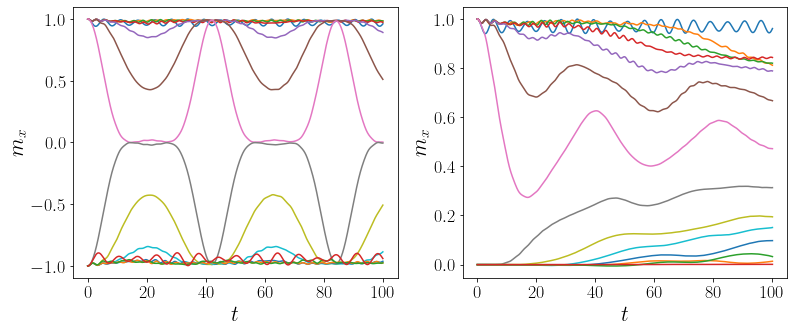

In [208]:
plt.figure(figsize=(6.4*2,5))
def layout():
    plt.tick_params(labelsize=18)
    plt.xlabel("$t$",fontsize=22)
    plt.ylabel("$m_x$",fontsize=22)

plt.subplot(121)
plt.plot(t_space,m[1])
layout()

plt.subplot(122)
plt.plot(t_space,m[0])
layout()

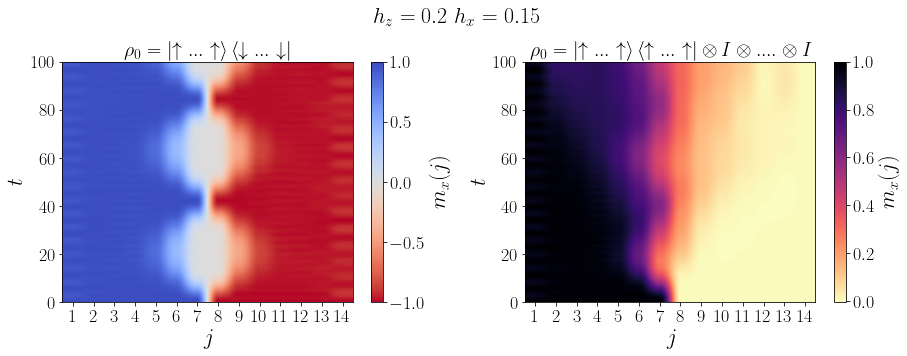

In [199]:
plt.rc('text',usetex=True)
plt.figure(figsize=(6.4*2,5))
def layout():
    plt.tick_params(labelsize=18)
    plt.xlabel("$j$",fontsize=22)
    plt.ylabel("$t$",fontsize=22)
    cb = plt.colorbar()
    cb.set_label("$m_x(j)$",fontsize=22)
    cb.ax.tick_params(labelsize=18)
    plt.xticks(np.arange(1,15)-0.5,[r'$%d$'%(x) for x in np.arange(1,15)])
    #plt.clim([-1,1])
plt.subplot(121)
plt.imshow(m[1],aspect='auto',origin='lower',extent=[0,14,0,t_space[-1]],cmap=sns.color_palette('coolwarm_r',as_cmap=True))
layout()
plt.title(r'$\rho_0 = \left|\uparrow...\uparrow\right>\left<\downarrow...\downarrow\right|$',fontsize=20)

plt.subplot(122)
plt.imshow(m[0],aspect='auto',origin='lower',extent=[0,14,0,t_space[-1]],cmap=sns.color_palette('magma_r',as_cmap=True))
layout()
plt.title(r'$\rho_0 = \left|\uparrow...\uparrow\right>\left<\uparrow...\uparrow\right|\otimes I\otimes....\otimes I$',fontsize=20)

plt.gcf().suptitle(r"$h_z = 0.2$ $h_x=0.15$",fontsize=22)

plt.tight_layout()

plt.savefig("confinment_finite_temperature.jpg",format='jpg',dpi=400)

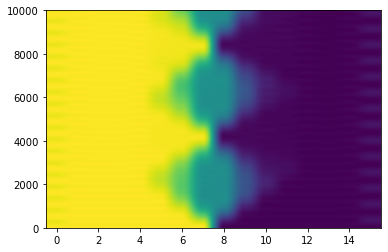

In [24]:
plt.imshow(m,aspect='auto',origin='lower')
plt.colorbar

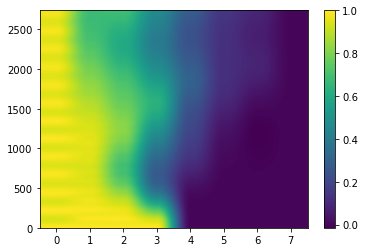

In [117]:
plt.imshow(m,aspect='auto',origin='lower')
plt.colorbar()

ValueError: x and y must have same first dimension, but have shapes (623,) and (2, 16)

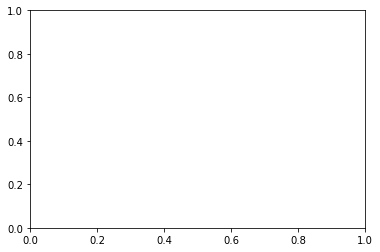

In [203]:
for x in range(L):
    plt.plot(t_space,np.array(m)[:,x])

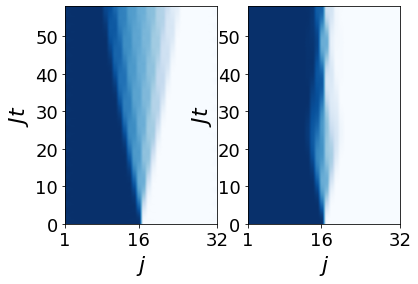

In [233]:

m = np.array(m)
#mtilde = np.zeros_like(m)
#for i in range(len(t_space)):
#    mtilde[i,:] = m[i,:]-m[0,:]
L = engine.MPS.L
for k in range(2):
    plt.subplot(1,2,k+1)
    plt.imshow(m[k],origin='lower',aspect='auto',cmap=sns.color_palette('Blues',as_cmap=True),extent=[1,L,0,t_space[-1]])

    #plt.clim([-1,1])
    #plt.colorbar()
    plt.tick_params(labelsize=18)
    plt.ylabel(r"$J t$",fontsize=22)
    plt.xlabel(r"$j$",fontsize=22)
    plt.xticks([1,L//2,L])
    #plt.colorbar()
    

<ipython-input-241-4b19bfe5a205>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = np.array(m)


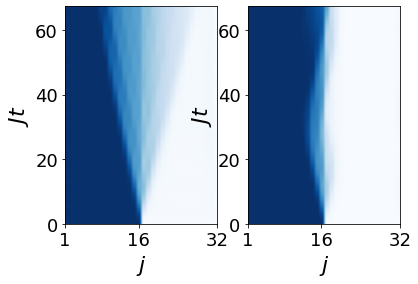

In [241]:

m = np.array(m)
#mtilde = np.zeros_like(m)
#for i in range(len(t_space)):
#    mtilde[i,:] = m[i,:]-m[0,:]
L = engine.MPS.L
for k in range(2):
    plt.subplot(1,2,k+1)
    plt.imshow(m[k],origin='lower',aspect='auto',cmap=sns.color_palette('Blues',as_cmap=True),extent=[1,L,0,t_space[-1]])

    #plt.clim([-1,1])
    #plt.colorbar()
    plt.tick_params(labelsize=18)
    plt.ylabel(r"$J t$",fontsize=22)
    plt.xlabel(r"$j$",fontsize=22)
    plt.xticks([1,L//2,L])
    #plt.colorbar()
    

In [630]:
for x in engine.MPS.M:
    print(x.shape)

(1, 2, 2, 4)
(4, 2, 2, 11)
(11, 2, 2, 26)
(26, 2, 2, 37)
(37, 2, 2, 38)
(38, 2, 2, 39)
(39, 2, 2, 41)
(41, 2, 2, 44)
(44, 2, 2, 52)
(52, 2, 2, 61)
(61, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 64)
(64, 2, 2, 61)
(61, 2, 2, 52)
(52, 2, 2, 44)
(44, 2, 2, 41)
(41, 2, 2, 39)
(39, 2, 2, 38)
(38, 2, 2, 36)
(36, 2, 2, 25)
(25, 2, 2, 11)
(11, 2, 2, 4)
(4, 2, 2, 1)


In [4]:
h_space = [.1,.2]#np.arange(0.01,0.4,0.005)
L = 8
N = 2**L
J = 0.1
dbeta = 1e-3*5
sigma_z = np.array([[1,0],[0,-1]])

G = []; op1 = []; op2 = []
T = [];
for h in h_space:   
    print('h',h,end=' ')
    beta = 0.
    H = SS2d.IsingMPO_2D_diagonal_MPS(L,h=h,J=J)
    engine = ttdvp.thermalTDVP2(H)
    engine.initialize()
    E = []
    E.append(engine.MPS.contractMPOmixMPS(H))
    engine.chi_MAX = 128
    while(E[-1]+2*L*J*(L-1)>0):
        #print('diff:',E[-1]+2*L*J*(L-1))
        if beta<3*dbeta:
            engine.truncate_info = False
        else:
            engine.truncate_info = True
        engine.beta_step(dbeta,1e-11)
        E.append(engine.MPS.contractMPOmixMPS(H))
        beta += dbeta
    corr_stuff = mix_compute_corr(engine.MPS,sigma_z)

    G.append(corr_stuff[0])
    op1.append(corr_stuff[1][0])
    op2.append(corr_stuff[1][1])
    T.append(1/beta)
    print('T',1/beta)


h 0.1 

KeyboardInterrupt: 

In [9]:
for x in engine.MPS.M:
    print(x.shape)

(1, 2, 2, 3)
(3, 2, 2, 5)
(5, 2, 2, 6)
(6, 2, 2, 9)
(9, 2, 2, 9)
(9, 2, 2, 10)
(10, 2, 2, 17)
(17, 2, 2, 18)
(18, 2, 2, 23)
(23, 2, 2, 29)
(29, 2, 2, 37)
(37, 2, 2, 38)
(38, 2, 2, 41)
(41, 2, 2, 46)
(46, 2, 2, 48)
(48, 2, 2, 53)
(53, 2, 2, 54)
(54, 2, 2, 55)
(55, 2, 2, 56)
(56, 2, 2, 56)
(56, 2, 2, 56)
(56, 2, 2, 81)
(81, 2, 2, 82)
(82, 2, 2, 84)
(84, 2, 2, 87)
(87, 2, 2, 88)
(88, 2, 2, 88)
(88, 2, 2, 87)
(87, 2, 2, 118)
(118, 2, 2, 117)
(117, 2, 2, 119)
(119, 2, 2, 117)
(117, 2, 2, 119)
(119, 2, 2, 118)
(118, 2, 2, 119)
(119, 2, 2, 84)
(84, 2, 2, 84)
(84, 2, 2, 86)
(86, 2, 2, 86)
(86, 2, 2, 83)
(83, 2, 2, 80)
(80, 2, 2, 78)
(78, 2, 2, 52)
(52, 2, 2, 51)
(51, 2, 2, 52)
(52, 2, 2, 50)
(50, 2, 2, 49)
(49, 2, 2, 49)
(49, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 22)
(22, 2, 2, 20)
(20, 2, 2, 20)
(20, 2, 2, 18)
(18, 2, 2, 16)
(16, 2, 2, 14)
(14, 2, 2, 15)
(15, 2, 2, 10)
(10, 2, 2, 6)
(6, 2, 2, 3)
(3, 2, 2, 1)


In [108]:
for x in engine.MPS.M:
    print(x.shape)

(1, 2, 2, 4)
(4, 2, 2, 12)
(12, 2, 2, 13)
(13, 2, 2, 30)
(30, 2, 2, 30)
(30, 2, 2, 32)
(32, 2, 2, 59)
(59, 2, 2, 58)
(58, 2, 2, 60)
(60, 2, 2, 33)
(33, 2, 2, 31)
(31, 2, 2, 30)
(30, 2, 2, 14)
(14, 2, 2, 12)
(12, 2, 2, 4)
(4, 2, 2, 1)


In [97]:
h_space.size

78

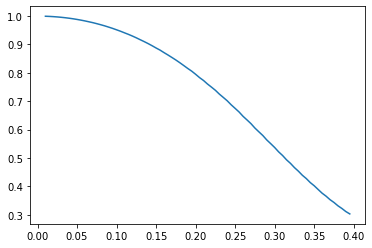

In [107]:
plt.plot(h_space,[(op2[x]).sum()/(16**2) for x in range(h_space.size)])

np.savetxt('4x4_J0.25.dat',np.array([(op2[x]).sum()/(16**2) for x in range(h_space.size)]))
np.savetxt('Temperature_4x4_J0.25.dat',T)

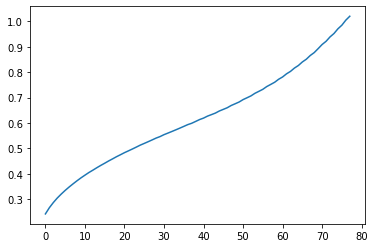

In [109]:
plt.plot(T)

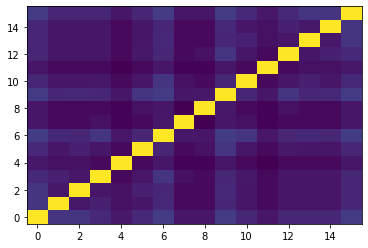

In [208]:
plt.imshow(op2[-1,:,:],aspect='auto',origin='lower')

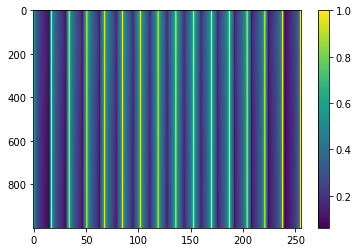

In [40]:
plt.imshow(op2[:,:].reshape(-1,256),aspect='auto')
plt.colorbar()

In [8]:
corr_stuff[0]

(1.038197773581648,
 (array([[ 5.55111512e-16],
         [-2.22044605e-16],
         [ 5.55111512e-16],
         [ 0.00000000e+00],
         [ 1.11022302e-16],
         [ 6.66133815e-16],
         [ 6.66133815e-16],
         [ 3.33066907e-16],
         [-8.88178420e-16],
         [-3.33066907e-16],
         [-2.22044605e-16],
         [ 1.11022302e-16],
         [-1.11022302e-16],
         [-4.44089210e-16],
         [-5.55111512e-16],
         [-3.33066907e-16]]),
  array([[ 1.00000000e+00,  1.99920038e-02,  3.99733495e-04,
           7.99253888e-06,  1.59808168e-07,  3.19531141e-09,
           6.38891935e-11,  1.27744296e-12,  2.55420727e-14,
           5.10724884e-16,  1.02179686e-17,  2.06171916e-19,
           3.49891739e-21, -2.70499673e-22, -1.99382111e-22,
          -3.34808424e-24],
         [ 1.99920038e-02,  1.00000000e+00,  1.99920043e-02,
           3.99733504e-04,  7.99253905e-06,  1.59808172e-07,
           3.19531148e-09,  6.38891806e-11,  1.27744407e-12,
           2.5

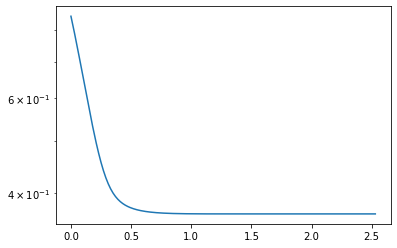

In [209]:
plt.plot(dbeta*np.arange(len(mx)),np.abs(mx-ncon([engine_GS.MPS.M[0],sigma_x,engine_GS.MPS.M[0]],[[1,2,3],[2,5],[1,5,3]])))
plt.yscale('log')

In [171]:
engine_GS = dmrg.DMRG1(H)

In [172]:
engine_GS.initialize(64)

In [173]:
for _ in range(10):
    engine_GS.dmrg_step()

C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[3] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:43: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


In [28]:
ncon([engine_GS.MPS.M[0],sigma_x,engine_GS.MPS.M[0]],[[1,2,3],[2,5],[1,5,3]])

array(0.84978976+0.j)

In [13]:
sigma_z.shape

(2, 2)

In [27]:
2*L*(L-1)

24

In [17]:
engine.MPS.M[10]

array([[[[-6.72026324e-01+0.j,  1.50864738e-01+0.j,
          -3.02278976e-04+0.j,  4.01305618e-05+0.j]],

        [[-6.72026324e-01+0.j, -1.50864738e-01+0.j,
           3.02278976e-04+0.j,  4.01305618e-05+0.j]]],


       [[[ 1.50865764e-01+0.j, -5.34585430e-02+0.j,
          -8.51797981e-04+0.j,  1.78749657e-04+0.j]],

        [[-1.50865764e-01+0.j, -5.34585430e-02+0.j,
          -8.51797981e-04+0.j, -1.78749657e-04+0.j]]],


       [[[ 1.49957575e-05+0.j, -9.64407129e-04+0.j,
          -6.60284616e-05+0.j,  1.26651968e-05+0.j]],

        [[-1.49957575e-05+0.j, -9.64407129e-04+0.j,
          -6.60284616e-05+0.j, -1.26651968e-05+0.j]]],


       [[[-5.26069215e-04+0.j,  3.05892720e-04+0.j,
           1.20345853e-05+0.j, -2.66202701e-06+0.j]],

        [[-5.26069215e-04+0.j, -3.05892720e-04+0.j,
          -1.20345853e-05+0.j, -2.66202701e-06+0.j]]]])

<ipython-input-190-88bf739c51ae>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/beta_space[:G.size],[(op2[x] ).sum()/(64**2) for x in range(G.size)])
<ipython-input-190-88bf739c51ae>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/beta_space[:G.size],np.ones(G.size)*(corr_gs ).sum()/(64**2))


(-5.0, 50.0)

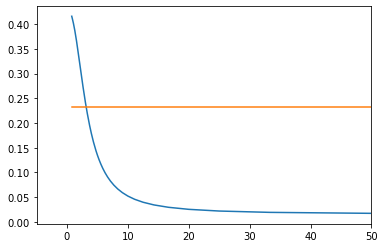

In [190]:
plt.plot(1/beta_space[:G.size],[(op2[x] ).sum()/(64**2) for x in range(G.size)])
plt.plot(1/beta_space[:G.size],np.ones(G.size)*(corr_gs ).sum()/(64**2))

plt.xlim([-5,50])



In [192]:
op2[0].sum()/(64**2)

0.01562499999999999

In [176]:
import compute_connected_correlation_function
stuffs = compute_connected_correlation_function.compute_corr(engine_GS.MPS,sigma_z)

In [180]:
corr_gs = stuffs[1][1]

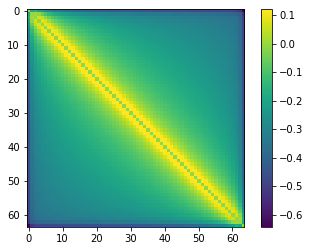

In [186]:
plt.imshow(corr_gs-(op2[-1] - np.eye(64)))
plt.colorbar()